##Machine Learning Assignment 1
###Brent Reynolds
###CS430
###Machine Learning in the Cloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the CSV file
df = pd.read_csv('/content/drive/My Drive/weather_2012.csv')

In [5]:
# Display the first five rows
print(df.head())

             Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
0  2012-01-01 00:00:00      -1.8                -3.9           86   
1  2012-01-01 01:00:00      -1.8                -3.7           87   
2  2012-01-01 02:00:00      -1.8                -3.4           89   
3  2012-01-01 03:00:00      -1.5                -3.2           88   
4  2012-01-01 04:00:00      -1.5                -3.3           88   

   Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)               Weather  
0                4              8.0           101.24                   Fog  
1                4              8.0           101.24                   Fog  
2                7              4.0           101.26  Freezing Drizzle,Fog  
3                6              4.0           101.27  Freezing Drizzle,Fog  
4                7              4.8           101.23                   Fog  


In [6]:
# Display the last five rows
print(df.tail())

                Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
8779  2012-12-31 19:00:00       0.1                -2.7           81   
8780  2012-12-31 20:00:00       0.2                -2.4           83   
8781  2012-12-31 21:00:00      -0.5                -1.5           93   
8782  2012-12-31 22:00:00      -0.2                -1.8           89   
8783  2012-12-31 23:00:00       0.0                -2.1           86   

      Wind Spd (km/h)  Visibility (km)  Stn Press (kPa) Weather  
8779               30              9.7           100.13    Snow  
8780               24              9.7           100.03    Snow  
8781               28              4.8            99.95    Snow  
8782               28              9.7            99.91    Snow  
8783               30             11.3            99.89    Snow  


In [7]:
# Display a sample of five random rows
print(df.sample(5))

                Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
3302  2012-05-17 14:00:00      15.3                 0.9           38   
795   2012-02-03 03:00:00     -11.6               -14.0           82   
4458  2012-07-04 18:00:00      23.4                20.7           85   
5575  2012-08-20 07:00:00      17.8                13.6           76   
2622  2012-04-19 06:00:00       4.7                -0.8           67   

      Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)        Weather  
3302               20             48.3           101.48   Mainly Clear  
795                 0             25.0           102.40   Mainly Clear  
4458                9             24.1           100.06   Mainly Clear  
5575                7             48.3           100.77   Mainly Clear  
2622                4             48.3           101.28  Mostly Cloudy  


In [8]:
# Display a list of all columns
print(df.columns.tolist())

['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather']


In [9]:
# Rename columns
df.columns = ['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']

In [10]:
# Display standard statistics for each column
print(df.describe())

            temp_c    dew_point  relative_humidity   wind_speed   visibility  \
count  8784.000000  8784.000000        8784.000000  8784.000000  8784.000000   
mean      8.798144     2.555294          67.431694    14.945469    27.664447   
std      11.687883    10.883072          16.918881     8.688696    12.622688   
min     -23.300000   -28.500000          18.000000     0.000000     0.200000   
25%       0.100000    -5.900000          56.000000     9.000000    24.100000   
50%       9.300000     3.300000          68.000000    13.000000    25.000000   
75%      18.800000    11.800000          81.000000    20.000000    25.000000   
max      33.000000    24.400000         100.000000    83.000000    48.300000   

          pressure  
count  8784.000000  
mean    101.051623  
std       0.844005  
min      97.520000  
25%     100.560000  
50%     101.070000  
75%     101.590000  
max     103.650000  


In [11]:
# Add temp_f column
df['temp_f'] = df['temp_c'] * 9/5 + 32

In [12]:
# Rearrange columns
# https://datagy.io/pandas-move-column/
cols = df.columns.tolist()
cols.insert(cols.index('temp_c'), cols.pop(cols.index('temp_f')))
df = df[cols]

In [13]:
# Display data types of all columns
print(df.dtypes)

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object


In [14]:
# Convert date_time column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])
print(df['date_time'].dtype)

datetime64[ns]


In [15]:
# Calculate average temperature (in F) for each month
monthly_avg = df.groupby(df['date_time'].dt.to_period("M"))['temp_f'].mean()
print(monthly_avg)

date_time
2012-01    18.731290
2012-02    24.395000
2012-03    37.618226
2012-04    44.616750
2012-05    61.227984
2012-06    68.241250
2012-07    73.022097
2012-08    72.102742
2012-09    61.672000
2012-10    51.718952
2012-11    33.676500
2012-12    26.048629
Freq: M, Name: temp_f, dtype: float64


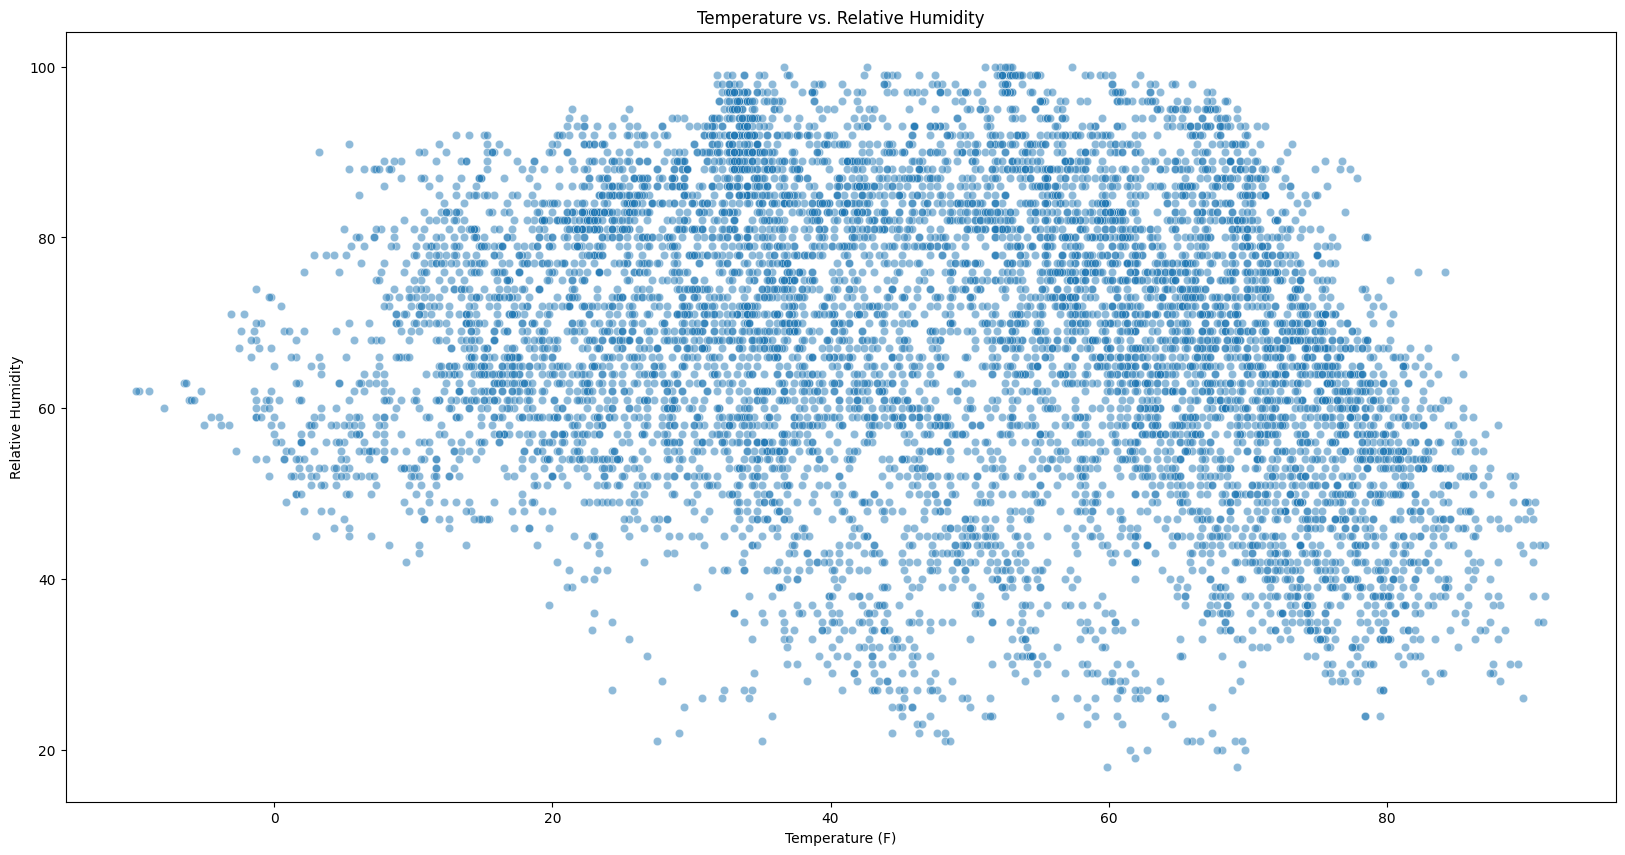

In [16]:
# Generate scatter plot of Temperature vs. Relative Humidity
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='temp_f', y='relative_humidity', alpha=0.5)
plt.xlabel('Temperature (F)')
plt.ylabel('Relative Humidity')
plt.title('Temperature vs. Relative Humidity')
plt.show()

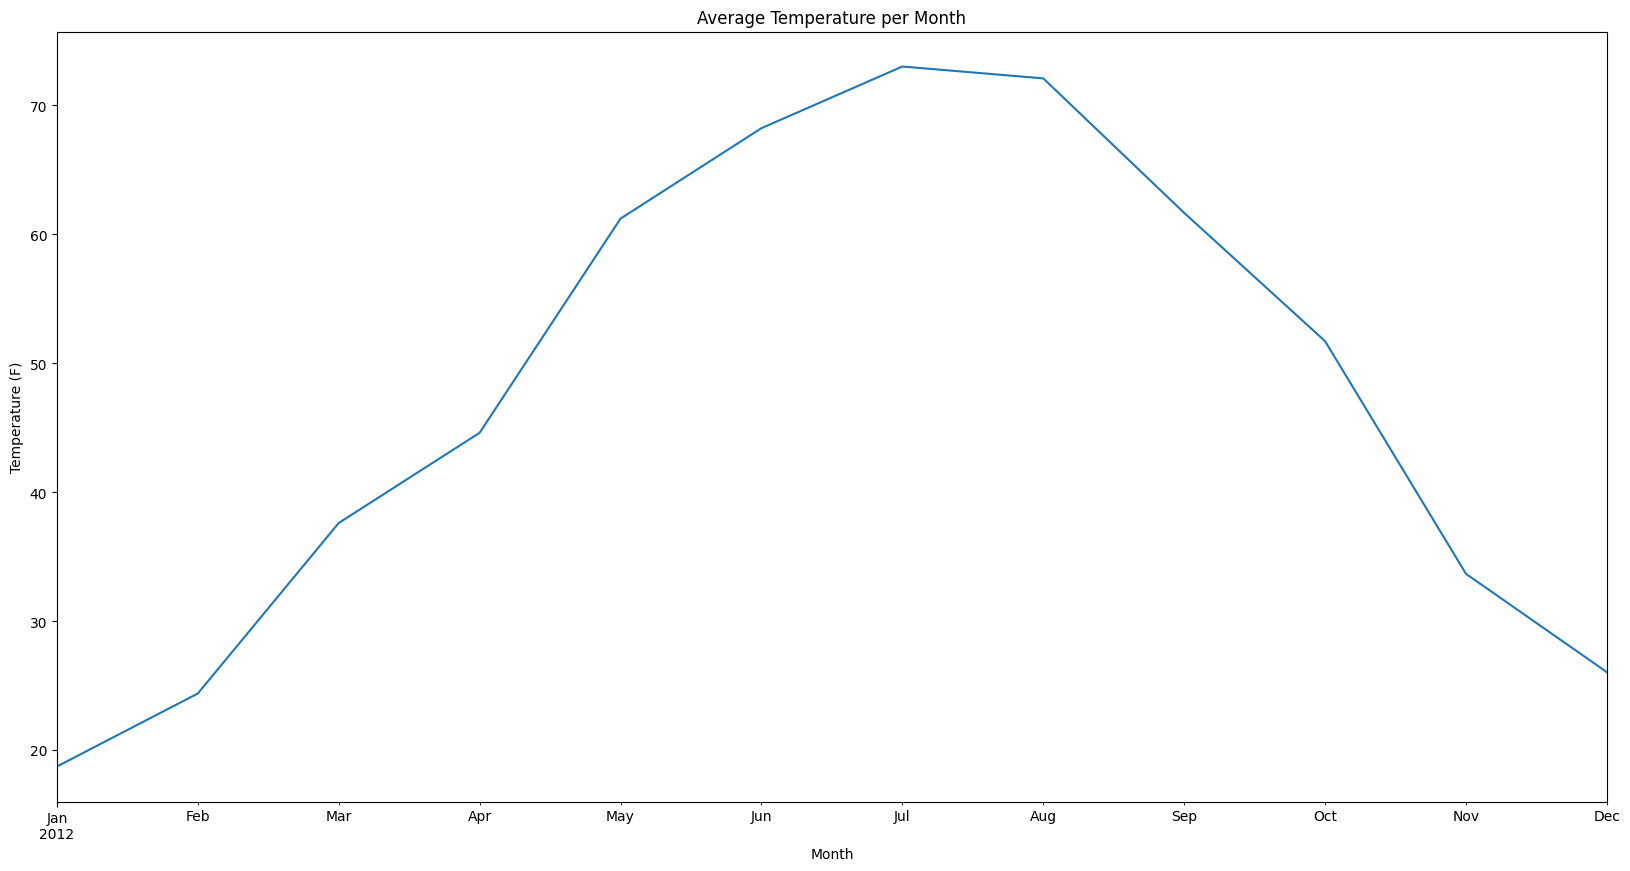

In [19]:
# Generate line chart of Average Temperature per Month
plt.figure(figsize=(20, 10))
monthly_avg.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.title('Average Temperature per Month')
plt.show()

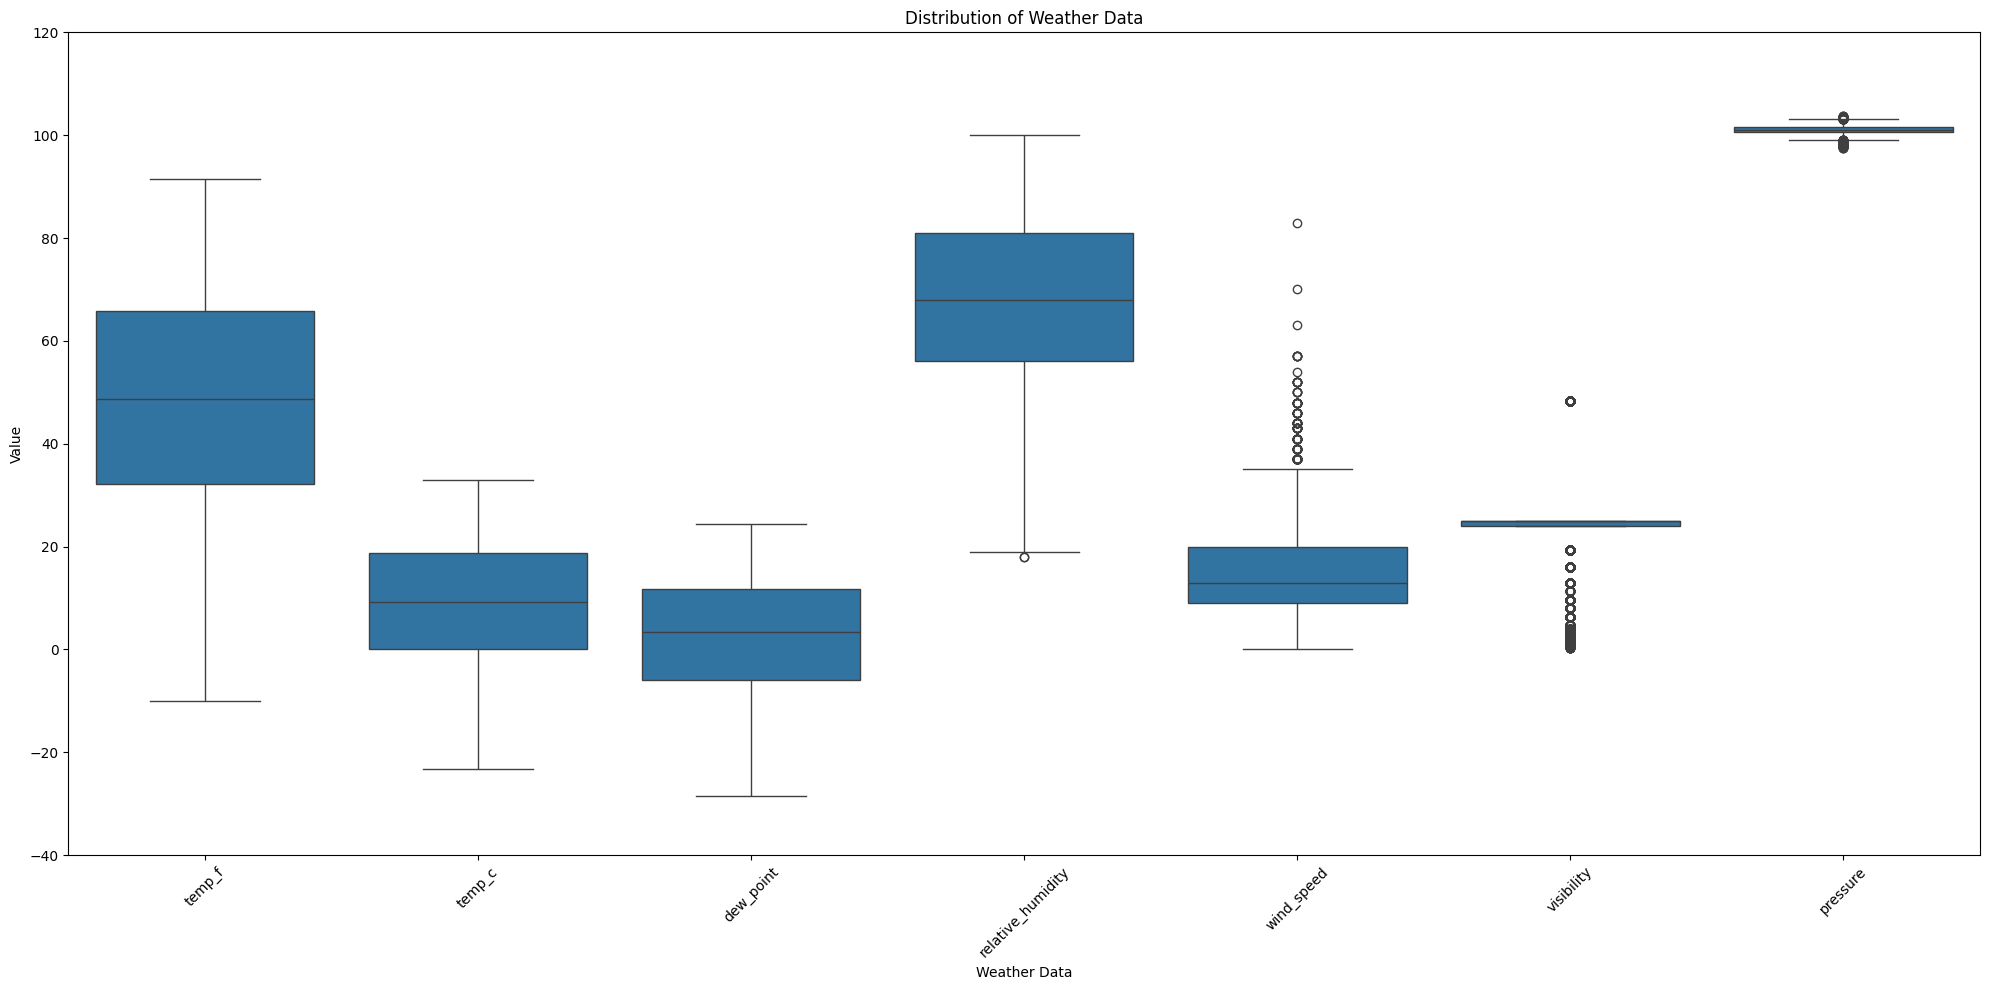

In [20]:
numeric_cols = ['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure']
df_long = df[numeric_cols].melt(var_name='Variable', value_name='Value')

# Generate box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Variable', y='Value', data=df_long)
plt.xlabel('Weather Data')
plt.ylabel('Value')
plt.title('Distribution of Weather Data')
plt.ylim(-40, 120)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
